In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Stałe
c = 3*10**(8) # light velocity


In [3]:
# Transfer matrix

# a - thicness of layer
# n - refractive index of layer
# k = n*k_0
# |k| = 2 pi / lambda

def trans_matrix_a(a,n,omega):
    k = omega * n/c
    T_a = np.array([[np.cos(k*a),1j/n*np.sin(k*a)],[1j*n*np.sin(k*a),np.cos(k*a)]])
    return T_a

Lustro Bragga z naprzemiennie ułożonymi warstwami półprzewodnika o współczynnikach załamania n_a=3 i n_b=3.5. 

Załóżmy że mamy po 6 warstw z każdego rodzaju. Niech grubości warstw a, b będą a =1 i b takie żeby był spełniony warunek n_a * a  = n_b * b. W ten sposób mamy zapewnione interference condition z równania (2.109), co sprawi że lustro będzie miało dobre właściwości odbicia. 

Poza obszarem lustra załóżmy, że n=1.

In [4]:
# Parameters
n_a = 3
n_b = 3.5
a = 1
b = n_a * a / n_b
#print(b)

n_out = 1

In [5]:
omega = 2 * np.pi * c / 12

# transition matrix across m layer structure
def getMatrix(omega):
    T_a = trans_matrix_a(a,n_a,omega)
    T_b = trans_matrix_a(b,n_b,omega)
    T = np.dot(T_b,T_a) # transition matrix across one ab layer
    
    m = 12
    T_m = T
    for i in range(m-1):
        T_m = np.dot(T_m,T)
    return T_m

T_m = getMatrix(omega)

# t11 = T_m[0,0]
# t12 = T_m[0,1]
# t21 = T_m[1,0]
# t22 = T_m[1,1]

In [6]:
def reflection_coeff(n_left, n_right, Tm):
    t11 = Tm[0,0]
    t12 = Tm[0,1]
    t21 = Tm[1,0]
    t22 = Tm[1,1]
    num = n_right*t11 + n_left*n_right*t12 - t21 - n_left*t22
    denom = t21 - n_left*t22 - n_right*t11 + n_left*n_right*t12
    return num/denom

rs = reflection_coeff(n_out,n_out,T_m)
print(np.abs(rs))

0.9517278862493831


In [7]:
def transmission_coeff(n_left, n_right, Tm):
    t11 = Tm[0,0]
    t12 = Tm[0,1]
    t21 = Tm[1,0]
    t22 = Tm[1,1]
    num = t12*t21 - t11*t22
    denom = t21 - n_left*t22 - n_right*t11 + n_left*n_right*t12
    return 2*n_left * num/denom

ts = transmission_coeff(n_out,n_out,T_m)

In [8]:
#np.abs(rs)**2 + np.abs(ts)**2

In [9]:
x = np.linspace(2*np.pi*c/12-50000000,2*np.pi*c/12+50000000,100)

ref_coeffs = []
trans_coeffs = []
for i in x:
    matrix = getMatrix(i)
    ref_coeffs.append(reflection_coeff(n_out, n_out, matrix))
    trans_coeffs.append(transmission_coeff(n_out, n_out, matrix))

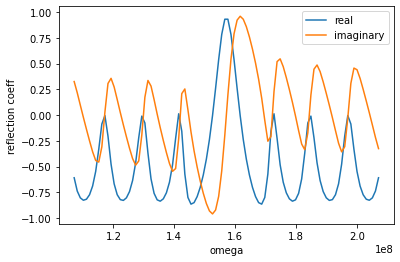

In [13]:
plt.plot(x,np.real(ref_coeffs),label='real') ## abs??
plt.plot(x,np.imag(ref_coeffs), label='imaginary')
plt.xlabel('omega')
plt.ylabel('reflection coeff')
plt.legend()

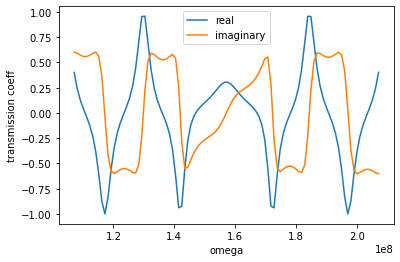

In [15]:
plt.plot(x,np.real(trans_coeffs),label='real')
plt.plot(x,np.imag(trans_coeffs), label='imaginary')
plt.xlabel('omega')
plt.ylabel('transmission coeff')
plt.legend()